In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
import random
import numpy as np
import os
import pandas as pd
import innvestigate
import matplotlib.pyplot as plt

In [2]:
cnn_attention_gru = load_model('C:\\Users\\Administrator\\Documents\\TA\\cnn_attention_gru.h5')

In [3]:
folder_path = 'C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted\\'

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dfs = []

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    df = pd.read_csv(file_path, header=None)

    dfs.append(df)

combined_data = pd.concat(dfs, ignore_index=True)

# labels_to_eliminate = ['a', 'E', 'F', 'J']

# filtered_data = combined_data[~combined_data.iloc[:, -1].isin(labels_to_eliminate)]

X = combined_data.iloc[:, :-1] 
y = combined_data.iloc[:, -1]

In [4]:
def take256(list_data):
    if len(list_data) > 256:
        list_data = np.array(list_data)
        middle_index = len(list_data) // 2
        middle_data = list_data[middle_index - 128:middle_index + 128]

        list_data = middle_data.reshape(1, 256, 1)
        return list_data
    elif len(list_data) == 256:
        list_data = np.array(list_data)
        list_data = list_data.reshape(1, 256, 1)
        return list_data
    else:
        return "ERROR"

In [5]:
random_number = random.randint(0, 32017)
print(random_number)

22167


In [6]:
list = X.iloc[:random_number, :].values.flatten().tolist()

In [7]:
input_data = take256(list)

In [8]:
pred = cnn_attention_gru.predict(input_data)
prediction =  np.argmax(pred)
print(prediction)

1/1 [==============================] - 2s 2s/step
7


In [9]:
# plot_model(cnn_attention_gru, to_file=f'{folder_path}cnn_attention_gru_model.png', show_shapes=True)

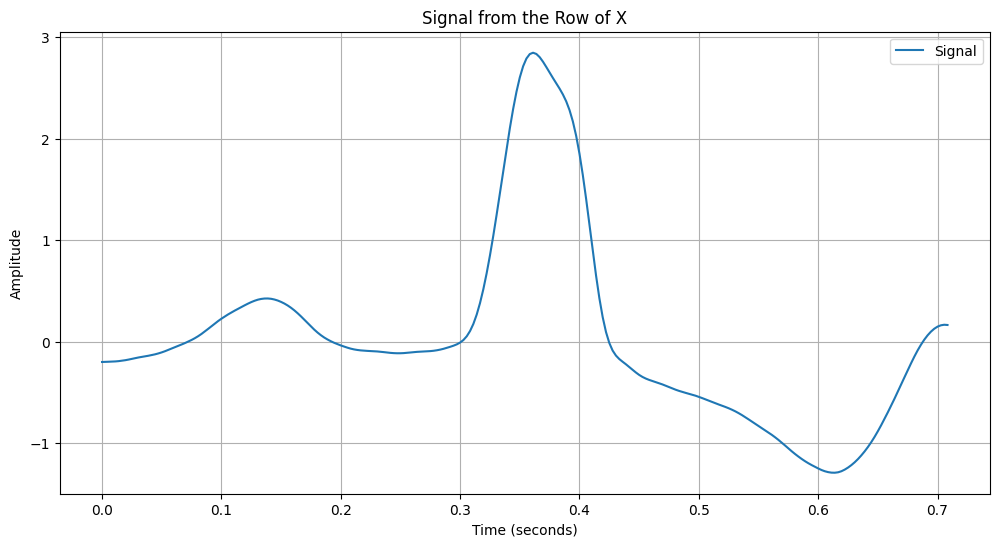

7


In [10]:
input_data_reshaped = input_data.reshape(input_data.shape[1])

fs = 360

# Create a time axis based on the sampling frequency
time_axis = np.arange(0, len(input_data_reshaped)) / fs

# Plot the signal
plt.figure(figsize=(12, 6))
plt.plot(time_axis, input_data_reshaped, label='Signal')
plt.title('Signal from the Row of X')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

print(prediction)

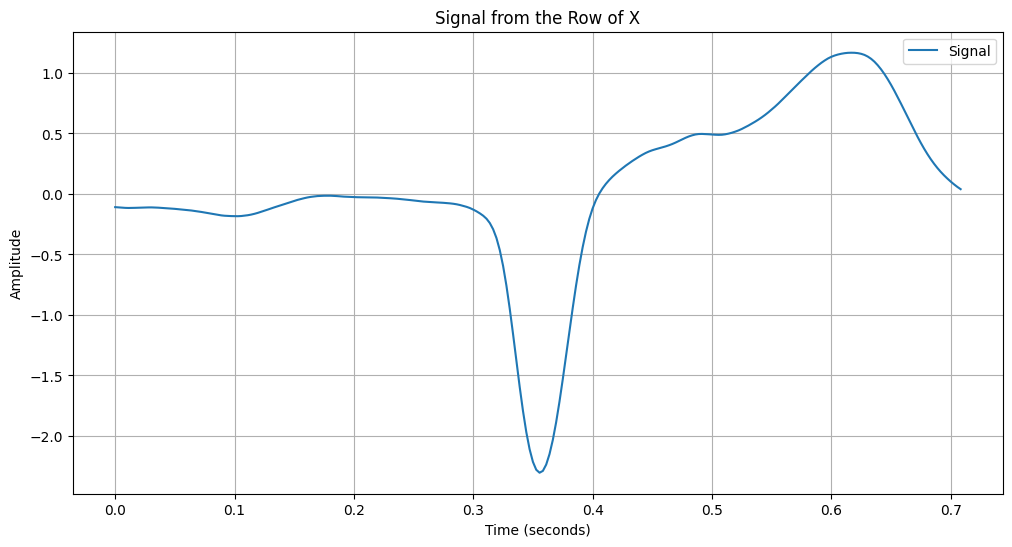

In [16]:
# 0 = ['A']
# 1 = ['E']
# 2 = ['F']
# 3 = ['J']
# 4 = ['L']
# 5 = ['N']
# 6 = ['R']
# 7 = ['V']
# 8 = ['a']

label_row = combined_data[combined_data[256] == "V"].iloc[0]
label_row = label_row.drop(labels=[256])

# Konversi baris menjadi list
label_list = np.array(label_row.tolist())

fs = 360

# Create a time axis based on the sampling frequency
time_axis = np.arange(0, len(label_list)) / fs

# Plot the signal
plt.figure(figsize=(12, 6))
plt.plot(time_axis, label_list, label='Signal')
plt.title('Signal from the Row of X')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
analyzer = innvestigate.create_analyzer('input', cnn_attention_gru)
relevance = analyzer.analyze(input_data)
relevance.shape

(1, 256, 1)

In [13]:
# Ubah ndarray menjadi list
relevance_list = relevance.squeeze().tolist()

# Urutkan list secara menurun
sorted_relevance = sorted(enumerate(relevance_list), key=lambda x: x[1], reverse=True)

# Ambil 50 elemen pertama setelah diurutkan
top_50_relevance = sorted_relevance[:50]

# Buat dictionary dari hasil urutan dengan indeks sebagai kunci dan nilai sebagai nilai
top_50_dict = {index: value for index, value in top_50_relevance}

print(top_50_dict)

{130: 2.848215341567993, 131: 2.8359124660491943, 129: 2.8347008228302, 132: 2.8043224811553955, 128: 2.7910828590393066, 133: 2.759159803390503, 127: 2.714606761932373, 134: 2.7069547176361084, 135: 2.6524014472961426, 126: 2.604762315750122, 136: 2.598662853240967, 137: 2.546759605407715, 138: 2.4943442344665527, 125: 2.4638962745666504, 139: 2.4368255138397217, 140: 2.368896722793579, 124: 2.295682430267334, 141: 2.2825987339019775, 142: 2.171401023864746, 123: 2.10491681098938, 143: 2.0293850898742676, 122: 1.8985378742218018, 144: 1.852979302406311, 121: 1.6827704906463623, 145: 1.6442246437072754, 120: 1.4647574424743652, 146: 1.4088352918624878, 119: 1.2504172325134277, 147: 1.1558928489685059, 118: 1.0444436073303223, 148: 0.898764431476593, 117: 0.851632833480835, 116: 0.6753520369529724, 149: 0.6521440744400024, 115: 0.5180504322052002, 150: 0.4298070967197418, 50: 0.4270661771297455, 49: 0.4265805780887604, 51: 0.42388105392456055, 48: 0.4225263297557831, 52: 0.4169231057167

In [14]:
# Filter nilai yang di atas 0.0 dan ambil indeksnya
filtered_indices = [index for index, value in enumerate(relevance_list) if value > 0.0]

print(filtered_indices)

[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 248, 249, 250, 251, 252, 253, 254, 255]


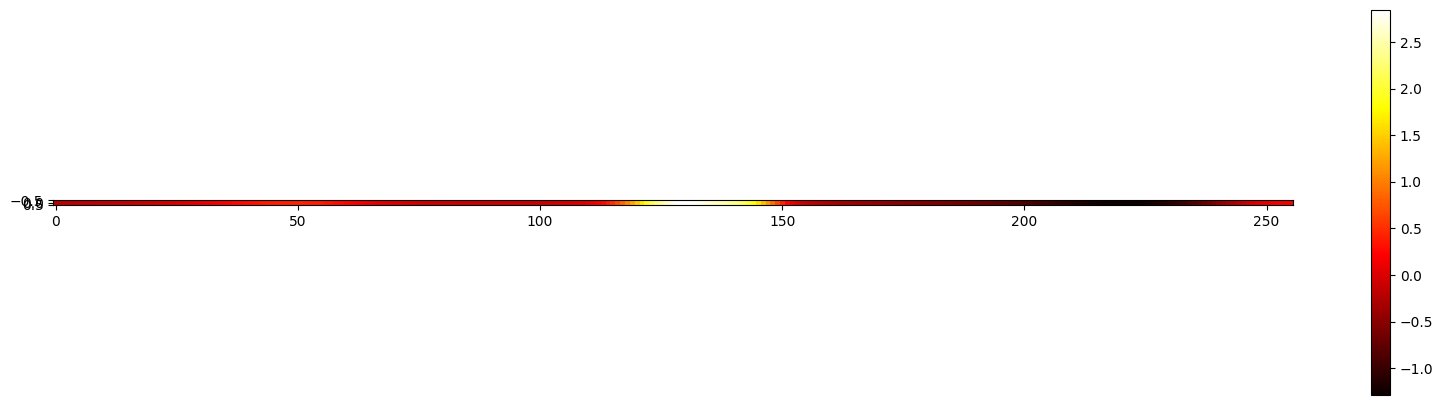

In [15]:
relevance_resized = np.resize(relevance, (1, 256, 1))

plt.figure(figsize=(20, 5))
plt.imshow(relevance_resized, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()